# Nettoyage des données

In [73]:
import os

In [74]:
imagesFolderPath = 'Images'
os.listdir(imagesFolderPath)

['n02085620-Chihuahua',
 'n02085782-Japanese_spaniel',
 'n02085936-Maltese_dog',
 'n02086079-Pekinese',
 'n02086240-Shih-Tzu',
 'n02086646-Blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-Rhodesian_ridgeback',
 'n02088094-Afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-Walker_hound',
 'n02089973-English_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-Irish_wolfhound',
 'n02091032-Italian_greyhound',
 'n02091134-whippet',
 'n02091244-Ibizan_hound',
 'n02091467-Norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-Saluki',
 'n02092002-Scottish_deerhound',
 'n02092339-Weimaraner',
 'n02093256-Staffordshire_bullterrier',
 'n02093428-American_Staffordshire_terrier',
 'n02093647-Bedlington_terrier',
 'n02093754-Border_terrier',
 'n02093859-Kerry_blue_terrier',
 'n02093991-Irish_terrier',
 'n02094114-Norfolk_terrier',
 'n02094258-Norwi

## Nettoyage des labels

In [75]:
for i in os.listdir(imagesFolderPath):
    categoryName = i.split('-')
    del categoryName[0]
    categoryName = '_'.join(categoryName).capitalize()
    os.rename(imagesFolderPath + '/' + i, imagesFolderPath +'/' + categoryName)

## Équilibrage des données

In [76]:
for i in os.listdir(imagesFolderPath):
    print(i , '-', len(os.listdir(imagesFolderPath + '/' + i)))

Affenpinscher - 150
Afghan_hound - 239
African_hunting_dog - 169
Airedale - 202
American_staffordshire_terrier - 164
Appenzeller - 151
Australian_terrier - 196
Basenji - 209
Basset - 175
Beagle - 195
Bedlington_terrier - 182
Bernese_mountain_dog - 218
Black_and_tan_coonhound - 159
Blenheim_spaniel - 188
Bloodhound - 187
Bluetick - 171
Border_collie - 150
Border_terrier - 172
Borzoi - 151
Boston_bull - 182
Bouvier_des_flandres - 150
Boxer - 151
Brabancon_griffon - 153
Briard - 152
Brittany_spaniel - 152
Bull_mastiff - 156
Cairn - 197
Cardigan - 155
Chesapeake_bay_retriever - 167
Chihuahua - 152
Chow - 196
Clumber - 150
Cocker_spaniel - 159
Collie - 153
Curly_coated_retriever - 151
Dandie_dinmont - 180
Dhole - 150
Dingo - 156
Doberman - 150
English_foxhound - 157
English_setter - 161
English_springer - 159
Entlebucher - 202
Eskimo_dog - 150
Flat_coated_retriever - 152
French_bulldog - 159
German_shepherd - 152
German_short_haired_pointer - 152
Giant_schnauzer - 157
Golden_retriever - 150

### Récupération de la plus petite représentation

In [77]:
min = len(os.listdir(imagesFolderPath + '/' + os.listdir(imagesFolderPath)[0]))
max = len(os.listdir(imagesFolderPath + '/' + os.listdir(imagesFolderPath)[0]))
for category in os.listdir(imagesFolderPath):
    if min > len(os.listdir(imagesFolderPath + '/' + category)):
        min = len(os.listdir(imagesFolderPath + '/' + category))
    if max < len(os.listdir(imagesFolderPath + '/' + category)):
        max = len(os.listdir(imagesFolderPath + '/' + category))

print('Nombre d\'image dans la plus petite catégorie: ', min)
print('Nombre d\'image dans la plus grande catégorie: ', max)

min:  148
max:  252


### Sous échantillonage des données

In [78]:
import random

In [79]:
# Parcourez les sous-dossiers dans le dossier principal
for category in os.listdir(imagesFolderPath):
    categoryPath = os.path.join(imagesFolderPath, category)
    
    categoryImages = os.listdir(categoryPath)
    if len(categoryImages) > min:
        toDelete = random.sample(categoryImages, len(categoryImages) - min)
        
        for file in toDelete:
            path = os.path.join(categoryPath, file)
            os.remove(path)
            print(f"Supprimé : {path}")


Supprimé : Images\Affenpinscher\n02110627_13420.jpg
Supprimé : Images\Affenpinscher\n02110627_11853.jpg
Supprimé : Images\Afghan_hound\n02088094_4230.jpg
Supprimé : Images\Afghan_hound\n02088094_2822.jpg
Supprimé : Images\Afghan_hound\n02088094_3858.jpg
Supprimé : Images\Afghan_hound\n02088094_392.jpg
Supprimé : Images\Afghan_hound\n02088094_4352.jpg
Supprimé : Images\Afghan_hound\n02088094_8631.jpg
Supprimé : Images\Afghan_hound\n02088094_12364.jpg
Supprimé : Images\Afghan_hound\n02088094_913.jpg
Supprimé : Images\Afghan_hound\n02088094_3531.jpg
Supprimé : Images\Afghan_hound\n02088094_1611.jpg
Supprimé : Images\Afghan_hound\n02088094_1003.jpg
Supprimé : Images\Afghan_hound\n02088094_4583.jpg
Supprimé : Images\Afghan_hound\n02088094_10982.jpg
Supprimé : Images\Afghan_hound\n02088094_3850.jpg
Supprimé : Images\Afghan_hound\n02088094_3582.jpg
Supprimé : Images\Afghan_hound\n02088094_1932.jpg
Supprimé : Images\Afghan_hound\n02088094_12945.jpg
Supprimé : Images\Afghan_hound\n02088094_4143

In [80]:
min = len(os.listdir(imagesFolderPath + '/' + os.listdir(imagesFolderPath)[0]))
max = len(os.listdir(imagesFolderPath + '/' + os.listdir(imagesFolderPath)[0]))
for category in os.listdir(imagesFolderPath):
    if min > len(os.listdir(imagesFolderPath + '/' + category)):
        min = len(os.listdir(imagesFolderPath + '/' + category))
    if max < len(os.listdir(imagesFolderPath + '/' + category)):
        max = len(os.listdir(imagesFolderPath + '/' + category))

print('Nombre d\'image dans la plus petite catégorie: ', min)
print('Nombre d\'image dans la plus grande catégorie: ', max)

min:  148
max:  148


## Séparation en donnée de train et test

In [81]:
import shutil


trainDirectory = 'train'
testDirectory = 'test'

os.makedirs(trainDirectory, exist_ok=True)
os.makedirs(testDirectory, exist_ok=True)

trainProportion = 0.8

for category in os.listdir(imagesFolderPath):
    print(category)
    categoryPath = os.path.join(imagesFolderPath, category)
    
    # Assurez-vous que c'est bien un dossier
    if os.path.isdir(categoryPath):
        files = os.listdir(categoryPath)
        
        random.shuffle(files)
        
        nbrTotal = len(files)
        nombre_entrainement = int(trainProportion * nbrTotal)
        
        trainingFiles = files[:nombre_entrainement]
        testingFiles = files[nombre_entrainement:]
        
        os.makedirs(os.path.join(trainDirectory, category), exist_ok=True)
        os.makedirs(os.path.join(testDirectory, category), exist_ok=True)
        
        for file in trainingFiles:
            shutil.copy(os.path.join(categoryPath, file), os.path.join(trainDirectory, category, file))
        for file in testingFiles:
            shutil.copy(os.path.join(categoryPath, file), os.path.join(testDirectory, category, file))


Affenpinscher
Afghan_hound
African_hunting_dog
Airedale
American_staffordshire_terrier
Appenzeller
Australian_terrier
Basenji
Basset
Beagle
Bedlington_terrier
Bernese_mountain_dog
Black_and_tan_coonhound
Blenheim_spaniel
Bloodhound
Bluetick
Border_collie
Border_terrier
Borzoi
Boston_bull
Bouvier_des_flandres
Boxer
Brabancon_griffon
Briard
Brittany_spaniel
Bull_mastiff
Cairn
Cardigan
Chesapeake_bay_retriever
Chihuahua
Chow
Clumber
Cocker_spaniel
Collie
Curly_coated_retriever
Dandie_dinmont
Dhole
Dingo
Doberman
English_foxhound
English_setter
English_springer
Entlebucher
Eskimo_dog
Flat_coated_retriever
French_bulldog
German_shepherd
German_short_haired_pointer
Giant_schnauzer
Golden_retriever
Gordon_setter
Greater_swiss_mountain_dog
Great_dane
Great_pyrenees
Groenendael
Ibizan_hound
Irish_setter
Irish_terrier
Irish_water_spaniel
Irish_wolfhound
Italian_greyhound
Japanese_spaniel
Keeshond
Kelpie
Kerry_blue_terrier
Komondor
Kuvasz
Labrador_retriever
Lakeland_terrier
Leonberg
Lhasa
Malamut

In [82]:
print('image par catégorie pour l\'entrainement: ', len(os.listdir('train/Pug')))
print('image par catégorie pour le test : ', len(os.listdir('test/Pug')))

image par catégorie pour l'entrainement:  118
image par catégorie pour le test :  30


## Entrainement du modèle

In [85]:
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image

In [86]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [87]:
train_gen = train_datagen.flow_from_directory(
    'train', 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='categorical', 
    seed = 42
)

Found 14160 images belonging to 120 classes.


In [88]:
val_gen = val_datagen.flow_from_directory(
    'test', 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='categorical',
    seed = 42
)

Found 3600 images belonging to 120 classes.


In [89]:
train_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory='train', target_size=(224,224), class_mode='categorical', batch_size=10)

Found 14160 images belonging to 120 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

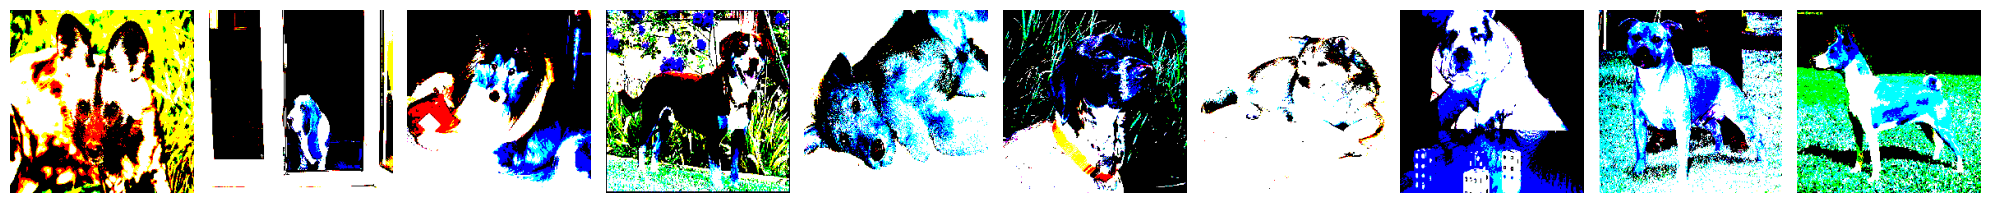

In [90]:
imgs, labels = next(train_batches)

fig, axes = plt.subplots(1, 10, figsize=(20,20))
axes = axes.flatten()
for img, ax in zip( imgs, axes):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

## Pré-traitement des images

In [91]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image

FileNotFoundError: [Errno 2] No such file or directory: 'Images/Pug/n02110958_10.jpg'

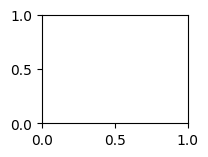

In [92]:
nbr =[10,25,152,237,353,476,481,589,609]
for i in range(9):
    plt.subplot(3, 3, i+1)
    filename = 'Images/' + 'Pug/' + 'n02110958_' + str(nbr[i]) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title(image.shape)
    plt.axis('Off')

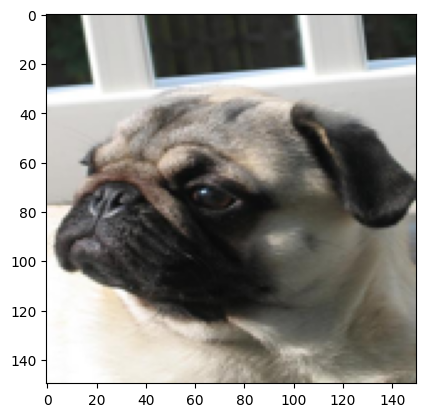

In [ ]:
test = Image.open('Images/Pug/n02110958_353.jpg')
test1 = test.resize((150, 150))
plt.imshow(test1)